# Data Understanding
### This is just a Jupyter Notebook for me to better understand the data that im working with!

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [13]:
def load_datasets(data_dir="../data/input/"):
    with open(f"{data_dir}allowance_events.json", 'r') as f:
        raw_data = json.load(f)
    events = pd.json_normalize(raw_data, sep="_")
    backend = pd.read_csv(f"{data_dir}allowance_backend_table.csv")
    schedule = pd.read_csv(f"{data_dir}payment_schedule_backend_table.csv")
    return events, backend, schedule


def inspect_dataset(df, name):
    print(f"Dataset: {name}")
    print("Shape:", df.shape)
    print("Columns:", df.columns)
    print("Missing Values:\n", df.isnull().sum())
    print("Data Types:\n", df.dtypes)
    print("=" * 50)

def summarize_numeric(df, name):
    print(f"Numeric Summary: {name}")
    print(df.describe())
    print("=" * 50)

def summarize_categorical(df, name):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        print(f"{col} - Unique Values: {df[col].nunique()}")
        print(df[col].value_counts().head(10))
        print("=" * 30)

def plot_distributions(df, cols, title):
    df[cols].hist(figsize=(10, 8), bins=20)
    plt.suptitle(title)
    plt.show()

In [14]:
events, backend, schedule = load_datasets()

In [15]:
inspect_dataset(events, "Allowance Events")
inspect_dataset(backend, "Allowance Backend Table")
inspect_dataset(schedule, "Payment Schedule Backend Table")

Dataset: Allowance Events
Shape: (6208, 6)
Columns: Index(['user_id', 'event_timestamp', 'event_name',
       'allowance_scheduled_frequency', 'allowance_scheduled_day',
       'allowance_amount'],
      dtype='object')
Missing Values:
 user_id                          0
event_timestamp                  0
event_name                       0
allowance_scheduled_frequency    0
allowance_scheduled_day          0
allowance_amount                 0
dtype: int64
Data Types:
 user_id                          object
event_timestamp                  object
event_name                       object
allowance_scheduled_frequency    object
allowance_scheduled_day          object
allowance_amount                  int64
dtype: object
Dataset: Allowance Backend Table
Shape: (2882, 7)
Columns: Index(['uuid', 'creation_date', 'frequency', 'day', 'updated_at',
       'next_payment_day', 'status'],
      dtype='object')
Missing Values:
 uuid                0
creation_date       0
frequency           0
day  

In [16]:
summarize_numeric(backend, "Allowance Backend Table")
summarize_numeric(schedule, "Payment Schedule Backend Table")
summarize_categorical(events, "Allowance Events")

Numeric Summary: Allowance Backend Table
       creation_date  next_payment_day
count   2.882000e+03       2882.000000
mean    1.728446e+09         12.001388
std     2.987946e+06          8.583299
min     1.721931e+09          1.000000
25%     1.726255e+09          6.000000
50%     1.728439e+09         11.000000
75%     1.731164e+09         18.000000
max     1.733231e+09         31.000000
Numeric Summary: Payment Schedule Backend Table
       payment_date
count   2139.000000
mean      11.257129
std        8.212922
min        1.000000
25%        6.000000
50%        9.000000
75%       15.000000
max       31.000000
user_id - Unique Values: 2879
user_id
560c5cf4-5fd8-4477-a62e-b45d1ede5440    60
72e8fe3f-0dd9-44e3-8775-660bacb17310    44
a311d6f3-4533-42ff-80a4-01dff99ba636    21
d18e2884-d104-4b28-8c09-e07c2f03a33b    21
36b0ed2c-7557-4a5e-9677-513efaf80812    21
c091a91b-c6fd-44cb-8ac7-fe3fdbafccea    18
076fec67-d770-445b-bccd-f6acadac1489    17
b073215a-671e-44df-876a-83e18dfe7c35    1

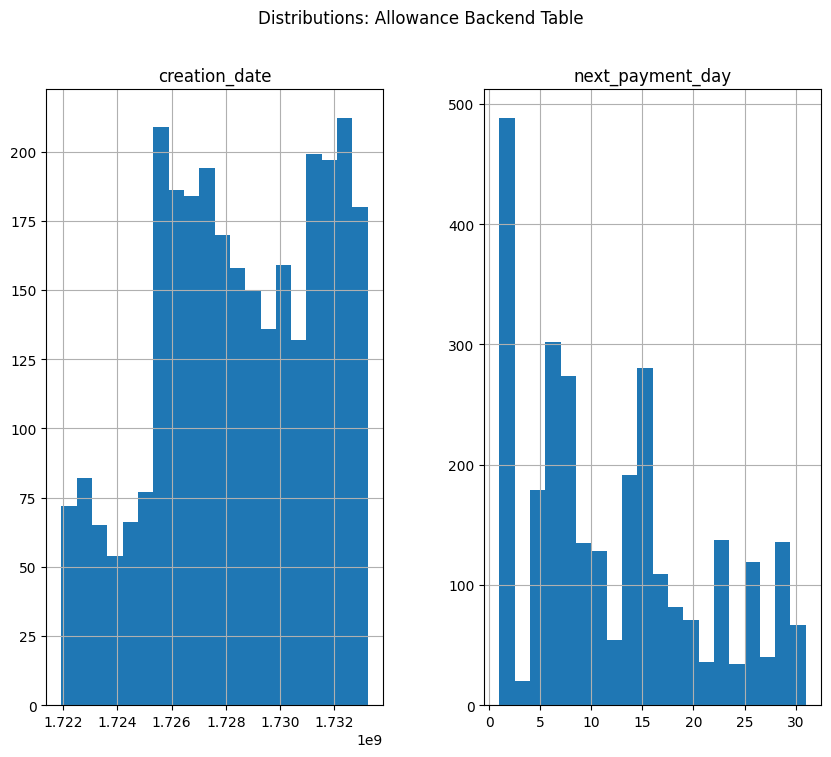

In [17]:
numeric_cols_backend = backend.select_dtypes(include='number').columns
plot_distributions(backend, numeric_cols_backend, "Distributions: Allowance Backend Table")

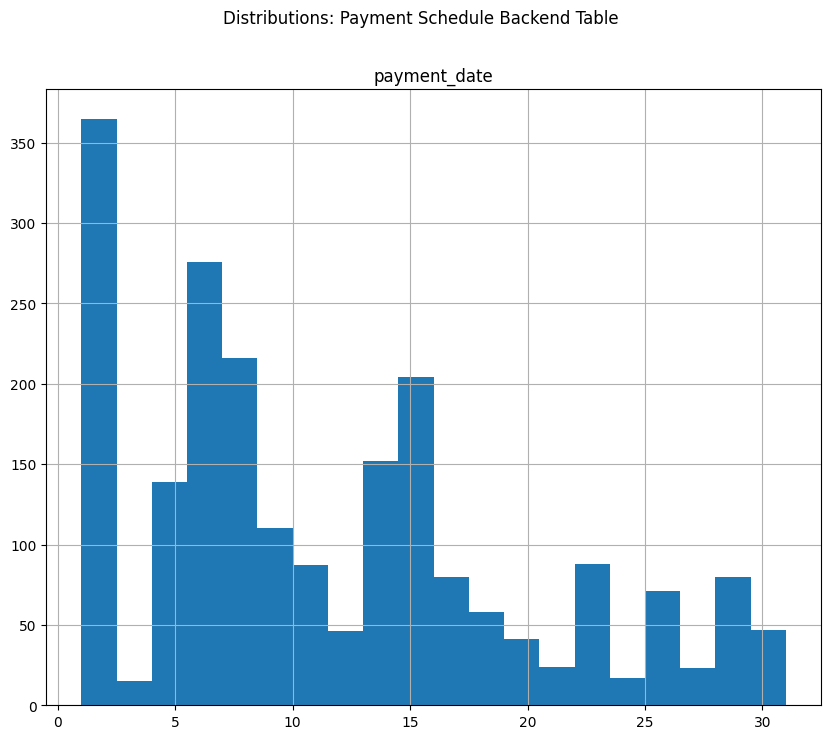

In [18]:
numeric_cols_schedule = schedule.select_dtypes(include='number').columns
plot_distributions(schedule, numeric_cols_schedule, "Distributions: Payment Schedule Backend Table")